In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('HR_comma_sep.csv')
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
df.shape

(14999, 10)

1. `How does the average satisfaction level change with increasing years of employment?`


In [2]:
group_data = df.groupby('time_spend_company')
avg = group_data['satisfaction_level'].mean()

print(avg)



time_spend_company
2     0.697078
3     0.626314
4     0.467517
5     0.610305
6     0.603440
7     0.635957
8     0.665062
10    0.655327
Name: satisfaction_level, dtype: float64


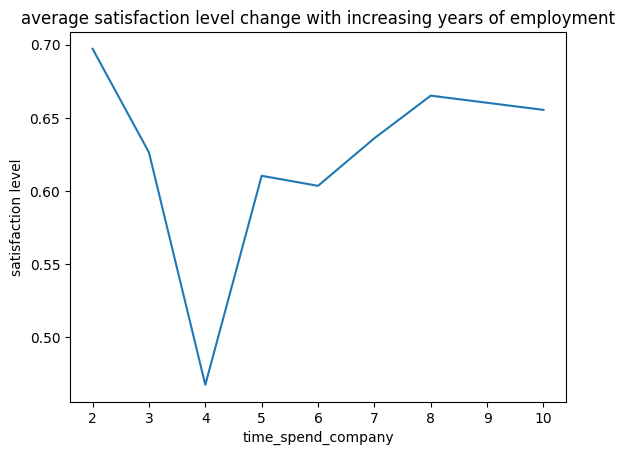

In [3]:

avg.plot(kind='line')

plt.xlabel('time_spend_company')
plt.ylabel('satisfaction level')
plt.title('average satisfaction level change with increasing years of employment')
plt.show()




The line plot shows that average satisfaction level change with increasing time spend in company

In [4]:

# avg.plot(kind='scatter')
# plt.xlabel('time_spend_company')
# plt.ylabel('satisfaction level')
# plt.show()




2. `How many employees have spent a specific number of years (time spent in the company)?`


In [5]:
time_spent = df.groupby('time_spend_company')
emp_size = time_spent.size()

emp_size
# plt.bar(emp_size, )


time_spend_company
2     3244
3     6443
4     2557
5     1473
6      718
7      188
8      162
10     214
dtype: int64

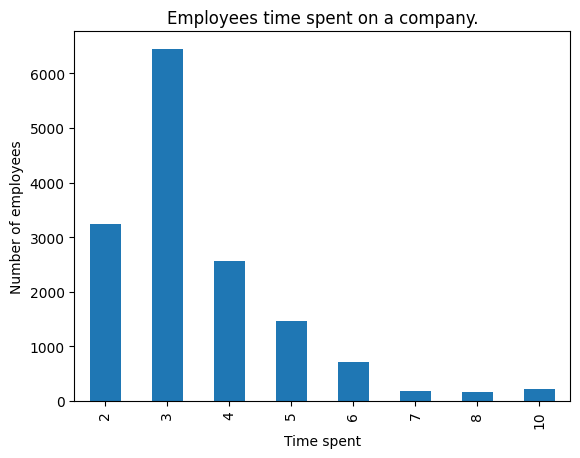

In [6]:
emp_size.plot(kind='bar')

plt.xlabel('Time spent')
plt.ylabel('Number of employees')
plt.title('Employees time spent on a company.')
plt.show()

In third year, the above bar shows that 6000 employees spent their time in a company which is a highest number.

Later years the number of employees minimized slowly. 

The bar is positive skewness where mean > mode > median.

3. `What is the distribution of satisfaction levels among employees?`


In [7]:
satis_level = df.groupby('satisfaction_level')

satis_size = satis_level.size()
satis_size

satisfaction_level
0.09    195
0.10    358
0.11    335
0.12     30
0.13     54
       ... 
0.96    203
0.97    176
0.98    183
0.99    172
1.00    111
Length: 92, dtype: int64

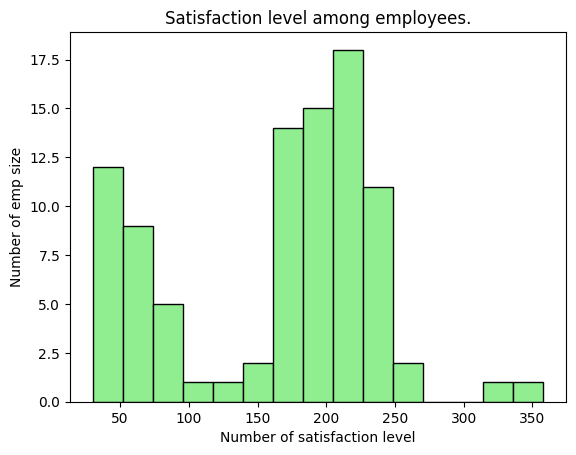

In [8]:
# satis_size.plot(kind='hist')
plt.hist(satis_size, color='lightgreen', ec= 'black', bins=15)

plt.title('Satisfaction level among employees.')
plt.xlabel('Number of satisfaction level')
plt.ylabel('Number of emp size')
plt.show()

4. `What is the distribution of work accidents among departments?`


In [9]:
work_accidents = df.groupby('Department')
work_accidents_size = work_accidents['Work_accident'].sum()
work_accidents_size

Department
IT             164
RandD          134
accounting      96
hr              89
management     103
marketing      138
product_mng    132
sales          587
support        345
technical      381
Name: Work_accident, dtype: int64

Text(0, 0.5, '')

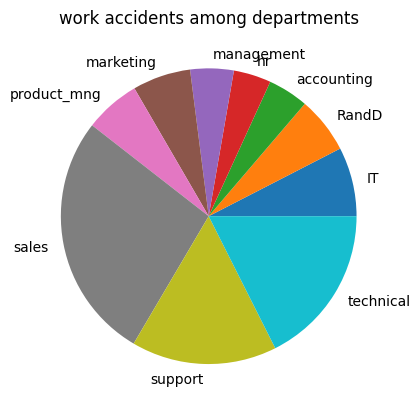

In [10]:
work_accidents_size.plot(kind='pie')

plt.title('work accidents among departments')
plt.xlabel('')
plt.ylabel('')

The above pie-chart shows that there is highest number of work accidents in sales department.

The lowest number of work_accidents is in accounting department.

5. `What is the distribution of promotions based on departments?`


In [11]:
promotion_distribution = df.groupby(['Department', 'promotion_last_5years'])['promotion_last_5years'].count().unstack()
promotion_distribution


promotion_last_5years,0,1
Department,,
IT,1224.0,3.0
RandD,760.0,27.0
accounting,753.0,14.0
hr,724.0,15.0
management,561.0,69.0
marketing,815.0,43.0
product_mng,902.0,NaN
sales,4040.0,100.0
support,2209.0,20.0


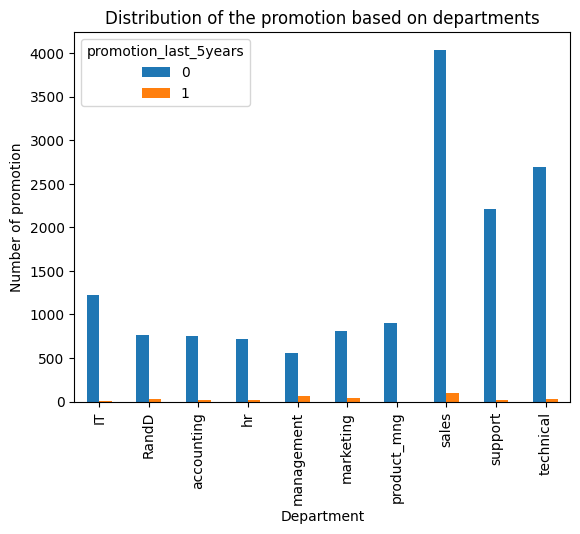

In [12]:
promotion_distribution.plot(kind='bar')
plt.title('Distribution of the promotion based on departments')
plt.xlabel('Department')
plt.ylabel('Number of promotion')
plt.show()


Sales department has the highest promotion among all others departments

6. `How does employee satisfaction vary across different departments?`


In [13]:
# grouped_data = df.groupby('Department')
# satisfaction_level = grouped_data['satisfaction_level'].describe()
# # print(satisfaction_level)

depart_wise_satisfaction = [
    df[df['Department']== depart]['satisfaction_level']
    for depart in df['Department'].unique()
]



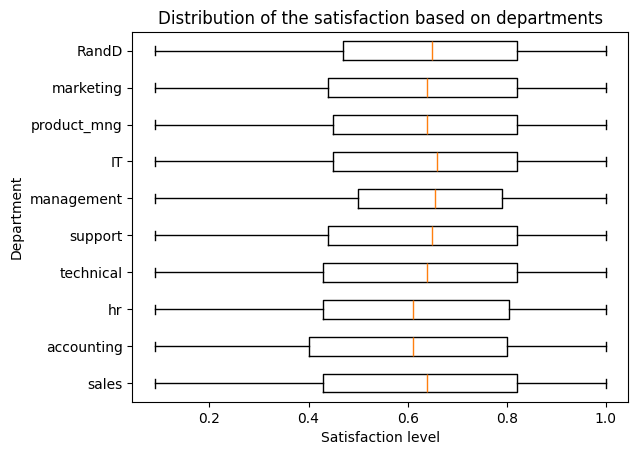

In [14]:
plt.boxplot(depart_wise_satisfaction, labels =df['Department'].unique(), vert = False)
# depart_wise_satisfaction.plot(kind='box')
plt.title('Distribution of the satisfaction based on departments')
plt.ylabel('Department')
plt.xlabel('Satisfaction level')
plt.show()

7. `Figure out employee leaving status (time_spend vs satisfaction_level vs left?`


In [15]:
time_spent = df.groupby('time_spend_company').agg({'satisfaction_level': 'mean', 'left': 'sum'}).reset_index()

x_data = time_spent['time_spend_company']
y_data = time_spent['satisfaction_level']
z_data = time_spent['left']



8. `How are the numerical variables correlated with each other?`


In [16]:
cor = df.corr(numeric_only=True)
print(cor)

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

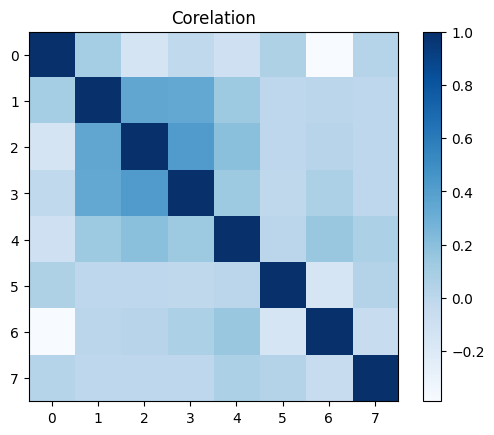

In [23]:
plt.imshow(cor, cmap='Blues')
plt.colorbar()
plt.title('Corelation')
plt.show()

9. `How to create different scatter plots under single matplotlib figure?`

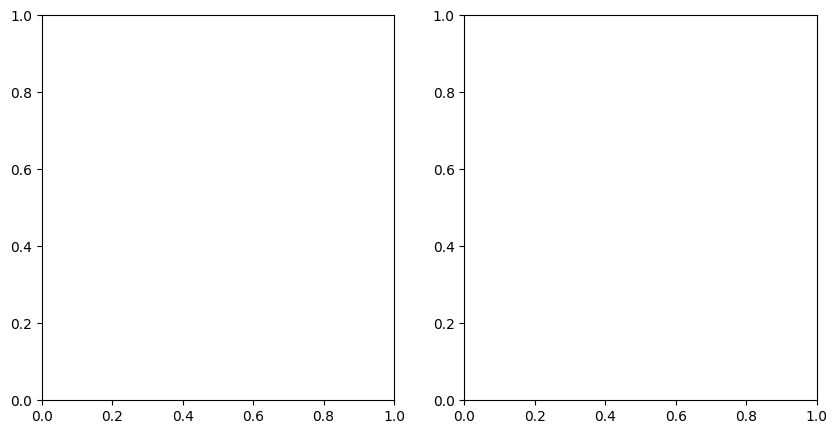

In [36]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

In [37]:
# Create a scatter plot on the first subplot
axs[0].scatter(x=df['satisfaction_level'], y=df['promotion_last_5years'])
axs[0].set_title('Scatter plot 1')
axs[0].set_xlabel('satisfaction_level')
axs[0].set_ylabel('promotion_last_5years')


Text(4.444444444444452, 0.5, 'promotion_last_5years')

In [38]:
# Create a scatter plot on the second subplot
axs[1].scatter(x=df['Work_accident'], y=df['left'])
axs[1].set_title('Scatter plot 2')
axs[1].set_xlabel('Work_accident')
axs[1].set_ylabel('left')


Text(427.1717171717171, 0.5, 'left')

In [41]:
# Display figure
plt.show()